# **Pengenalan Data yang Digunakan**

Data yang digunakan untuk membangun model sistem rekomendasi pada website Jogjadventure adalah dataset pariwisata Yogyakarta yang diperoleh dari Kaggle.
Link sumber data: https://www.kaggle.com/datasets/saufan/dataset-pariwisata-yogyakarta/data

# **Import Libraries**

In [ ]:
# Untuk load data dari gdrive
from google.colab import drive

# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

# Install geopy
!pip install geopy

# Import Nominatim
from geopy.geocoders import Nominatim

# **Load Dataset**

In [ ]:
url = 'https://drive.google.com/file/d/158UBn9FP8mD1gJ9ZdbgYuoqTH4zpdAP9/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_tour = pd.read_csv(path)

In [ ]:
df_tour.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Latitude,Longitude
0,85.0,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
1,86.0,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203
2,87.0,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249
3,88.0,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ???????...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304
4,89.0,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,NaN,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144


In [ ]:
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      126 non-null    float64
 1   Place_Name    126 non-null    object 
 2   Description   126 non-null    object 
 3   Category      126 non-null    object 
 4   City          126 non-null    object 
 5   Price         126 non-null    int64  
 6   Rating        126 non-null    float64
 7   Time_Minutes  60 non-null     float64
 8   Coordinate    126 non-null    object 
 9   Latitude      126 non-null    float64
 10  Longitude     126 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 11.0+ KB


Terdapat beberapa dataset pada sumber data, namun untuk membangun model sistem rekomendasi pada website Jogjadventure, hanya memerlukan dataset `tour` . Berikut keterangan fitur dataset `tour`:

*   Place_Id: ID tempat wisata (primary key)
*   Place_Name: Nama tempat wisata
*   Description: Deskripsi tempat wisata
*   Category: Kategori tempat wisata
*   City: Kota dari tempat wisata
*   Price: Harga tiket wisata
*   Rating: Penilaian dari pengunjung untuk tempat wisata
*   Time_Minutes: Lama berkunjung (menit)
*   Coordinate: Koordinat wisata, berisi latitude dan longitude
*   Latitude: Latitude tempat wisata
*   Longitude: Longitude tempat wisata









# **Data Preprocessing**

## Menghapus Fitur yang tidak digunakan

In [ ]:
df_tour.drop(columns=['City','Time_Minutes'], inplace=True)

Fitur `City` tidak digunakan karena tidak memberikan informasi secara spesifik terkait kota dari tempat wisata dan semua berisikan Yogyakarta.
Fitur `Time_Minutes` yang berisi lama berkunjung tidak digunakan untuk membangun model.

## Menambahkan fitur Address

Fitur `Address` berisi alamat lengkap dari tempat wisata. Alamat dapat diperoleh berdasarkan fitur `Latitude` dan `Longitude`.

In [ ]:
# Fungsi reverse geocode
def reverse_geocode(lat, lon):
    geolocator = Nominatim(user_agent="myGeocoder")
    location = geolocator.reverse((lat, lon), language='en')
    return location.address if location else "Unknown location"
df_tour['Address'] = df_tour.apply(lambda row: reverse_geocode(row['Latitude'], row['Longitude']), axis=1)
display(df_tour)

,Place_Id,Place_Name,Description,Category,Price,Rating,Coordinate,Latitude,Longitude,Address
0,85.0,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,6000,4.5,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655,"Jalan Sriwedani, Kampung Ketandan, Prawirodirj..."
1,86.0,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,15000,4.6,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203,"Royal Palace of Yogyakarta, Jalan Pesindenan, ..."
2,87.0,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,20000,4.2,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249,"Sindu Kusuma Edupark, Jalan Jambon V, Kricak, ..."
3,88.0,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ???????...,Budaya,3000,4.6,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304,"Benteng Vredeburg, Jalan Margo Mulyo, Kampung ..."
4,89.0,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,50000,4.4,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144,"XT Square, Jalan Veteran, Gambiran, Pandeyan, ..."
...,...,...,...,...,...,...,...,...,...,...
121,206.0,Wisata Kaliurang,"Jogja selalu menarik untuk dikulik, terlebih t...",Cagar Alam,8000,4.4,"{'lat': -7.6120675, 'lng': 110.4205209}",-7.612068,110.420521,"Jalan Boyong, Ngipiksari, Kaliurang, Hargobina..."
122,207.0,Heha Sky View,HeHa Sky View adalah salah satu tempat wisata ...,Taman Hiburan,15000,4.4,"{'lat': -7.8496144, 'lng': 110.478324}",-7.849614,110.478324,"Resto HeHa sky view, Jalan Sindangsari, Patuk,..."
123,208.0,Taman Sungai Mudal,"Taman Sungai Mudal, sebuah objek wisata alam t...",Cagar Alam,10000,4.6,"{'lat': -7.762813599999998, 'lng': 110.1161626}",-7.762814,110.116163,"Taman Sungai Mudal, Jalan Clapar, Bukit WIsata..."
124,209.0,Pantai Sanglen,Pantai Sanglen. Lokasinya berada di Desa Kemad...,Bahari,10000,4.5,"{'lat': -8.1367456, 'lng': 110.5716362}",-8.136746,110.571636,"Pantai Sangleng, Jalan Pantai Sepanjang, Kemad..."


## Membuat fitur City baru

Fitur `City` baru berisi kota tempat wisata yang diambil dari kolom `Address`

In [ ]:
def extract_city(address):
    cities = ['Kulonprogo', 'Gunung Kidul', 'Bantul', 'Sleman']
    for city in cities:
        if city in address:
            return city
    return 'Yogyakarta'  # Default jika tidak ada kota yang cocok

# Terapkan fungsi pada kolom 'Address'
df_tour['City'] = df_tour['Address'].apply(extract_city)

# Hasil
display(df_tour)

,Place_Id,Place_Name,Description,Category,Price,Rating,Coordinate,Latitude,Longitude,Address,City
0,85.0,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,6000,4.5,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655,"Jalan Sriwedani, Kampung Ketandan, Prawirodirj...",Yogyakarta
1,86.0,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,15000,4.6,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203,"Royal Palace of Yogyakarta, Jalan Pesindenan, ...",Yogyakarta
2,87.0,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,20000,4.2,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249,"Sindu Kusuma Edupark, Jalan Jambon V, Kricak, ...",Sleman
3,88.0,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ???????...,Budaya,3000,4.6,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304,"Benteng Vredeburg, Jalan Margo Mulyo, Kampung ...",Yogyakarta
4,89.0,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,50000,4.4,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144,"XT Square, Jalan Veteran, Gambiran, Pandeyan, ...",Yogyakarta
...,...,...,...,...,...,...,...,...,...,...,...
121,206.0,Wisata Kaliurang,"Jogja selalu menarik untuk dikulik, terlebih t...",Cagar Alam,8000,4.4,"{'lat': -7.6120675, 'lng': 110.4205209}",-7.612068,110.420521,"Jalan Boyong, Ngipiksari, Kaliurang, Hargobina...",Sleman
122,207.0,Heha Sky View,HeHa Sky View adalah salah satu tempat wisata ...,Taman Hiburan,15000,4.4,"{'lat': -7.8496144, 'lng': 110.478324}",-7.849614,110.478324,"Resto HeHa sky view, Jalan Sindangsari, Patuk,...",Gunung Kidul
123,208.0,Taman Sungai Mudal,"Taman Sungai Mudal, sebuah objek wisata alam t...",Cagar Alam,10000,4.6,"{'lat': -7.762813599999998, 'lng': 110.1161626}",-7.762814,110.116163,"Taman Sungai Mudal, Jalan Clapar, Bukit WIsata...",Kulonprogo
124,209.0,Pantai Sanglen,Pantai Sanglen. Lokasinya berada di Desa Kemad...,Bahari,10000,4.5,"{'lat': -8.1367456, 'lng': 110.5716362}",-8.136746,110.571636,"Pantai Sangleng, Jalan Pantai Sepanjang, Kemad...",Gunung Kidul


## Identifikasi missing value dan duplikasi data

In [ ]:
df_tour['Place_Id'].isnull().sum()

np.int64(0)

In [ ]:
df_tour.duplicated('Place_Id').sum()

np.int64(0)

Terlihat bahwa data tidak memiliki missing value dan duplikasi data.

## Identifikasi outlier

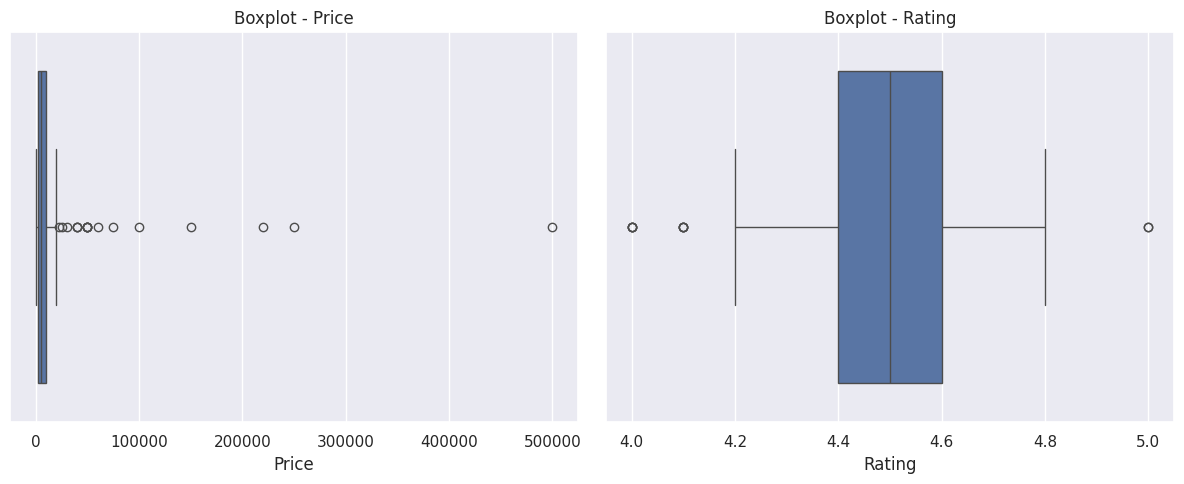

In [ ]:
# Ukuran figure
plt.figure(figsize=(12, 5))

# Boxplot untuk kolom Price
plt.subplot(1, 2, 1)
sns.boxplot(x=df_tour['Price'])
plt.title('Boxplot - Price')

# Boxplot untuk kolom Rating
plt.subplot(1, 2, 2)
sns.boxplot(x=df_tour['Rating'])
plt.title('Boxplot - Rating')

plt.tight_layout()
plt.show()

Berdasarkan boxplot, terlihat bahwa data `Price` tidak memiliki outlier karena setelah dilakukan research masih sesuai dengan harga wisata di Yogyakarta. Selain itu, tidak terdapat outlier pada Rating karena masih dalam rentang rating, yaitu bintang 1 sampai 5.

In [ ]:
df_tour.Category.unique()

array(['Taman Hiburan', 'Budaya', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan'], dtype=object)

In [ ]:
df_tour.City.unique()

array(['Yogyakarta', 'Sleman', 'Bantul', 'Gunung Kidul', 'Kulonprogo'],
      dtype=object)

Tidak terdapat unique value pada fitur `Category` dan `City`

## Menampilkan konten

In [ ]:
# Mengambil fitur-fitur yang akan digunakan sebagai konten: Place_Name, Category, City, dan Price
content_data = df_tour[['Place_Name', 'Category', 'City', 'Price']].copy()

print("Data sebelum pengelompokkan harga):")
print(content_data.head())
print("\nBentuk data:", content_data.shape)

Data sebelum pengelompokkan harga):
                            Place_Name       Category        City  Price
0              Taman Pintar Yogyakarta  Taman Hiburan  Yogyakarta   6000
1                   Keraton Yogyakarta         Budaya  Yogyakarta  15000
2           Sindu Kusuma Edupark (SKE)  Taman Hiburan      Sleman  20000
3  Museum Benteng Vredeburg Yogyakarta         Budaya  Yogyakarta   3000
4                 De Mata Museum Jogja         Budaya  Yogyakarta  50000

Bentuk data: (126, 4)


## Mengelompokkan Price

Pengelompokan harga dilakukan karena `Price` akan menjadi salah satu referensi pengunjung pada model sistem rekomendasi.

In [ ]:
def group_price(price):
    if price == 0:
        return '0'
    elif 1 <= price <= 50000:
        return '50000'
    elif 51000 <= price <= 100000:
        return '100000'
    elif 101000 <= price <= 150000:
        return '150000'
    elif 151000 <= price <= 200000:
        return '200000'
    else: # Untuk harga di atas 200 ribu
        return '>200000'

# Terapkan fungsi pengelompokkan pada kolom Price di DataFrame 'data'
df_tour['Price_Grouped'] = df_tour['Price'].apply(group_price)

# Tampilkan beberapa nilai dari kolom baru
print("\nContoh Kolom Harga yang Dikelompokkan di DataFrame 'data':")
print(df_tour[['Price', 'Price_Grouped']].head(40))


Contoh Kolom Harga yang Dikelompokkan di DataFrame 'data':
     Price Price_Grouped
0     6000         50000
1    15000         50000
2    20000         50000
3     3000         50000
4    50000         50000
5     5000         50000
6        0             0
7        0             0
8    60000        100000
9     7000         50000
10       0             0
11       0             0
12   15000         50000
13   15000         50000
14       0             0
15       0             0
16       0             0
17   40000         50000
18       0             0
19   20000         50000
20       0             0
21       0             0
22    5000         50000
23       0             0
24    3000         50000
25    3000         50000
26    3000         50000
27   25000         50000
28       0             0
29   30000         50000
30   15000         50000
31    2500         50000
32   22000         50000
33    5000         50000
34    5000         50000
35  250000       >200000
36   50000     

In [ ]:
Price_count = df_tour['Price_Grouped'].value_counts()
print(Price_count)

Price_Grouped
50000      94
0          25
100000      3
>200000     3
150000      1
Name: count, dtype: int64


In [ ]:
display(df_tour)

,Place_Id,Place_Name,Description,Category,Price,Rating,Coordinate,Latitude,Longitude,Address,City,Price_Grouped
0,85.0,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,6000,4.5,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655,"Jalan Sriwedani, Kampung Ketandan, Prawirodirj...",Yogyakarta,50000
1,86.0,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,15000,4.6,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203,"Royal Palace of Yogyakarta, Jalan Pesindenan, ...",Yogyakarta,50000
2,87.0,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,20000,4.2,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249,"Sindu Kusuma Edupark, Jalan Jambon V, Kricak, ...",Sleman,50000
3,88.0,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ???????...,Budaya,3000,4.6,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304,"Benteng Vredeburg, Jalan Margo Mulyo, Kampung ...",Yogyakarta,50000
4,89.0,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,50000,4.4,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144,"XT Square, Jalan Veteran, Gambiran, Pandeyan, ...",Yogyakarta,50000
...,...,...,...,...,...,...,...,...,...,...,...,...
121,206.0,Wisata Kaliurang,"Jogja selalu menarik untuk dikulik, terlebih t...",Cagar Alam,8000,4.4,"{'lat': -7.6120675, 'lng': 110.4205209}",-7.612068,110.420521,"Jalan Boyong, Ngipiksari, Kaliurang, Hargobina...",Sleman,50000
122,207.0,Heha Sky View,HeHa Sky View adalah salah satu tempat wisata ...,Taman Hiburan,15000,4.4,"{'lat': -7.8496144, 'lng': 110.478324}",-7.849614,110.478324,"Resto HeHa sky view, Jalan Sindangsari, Patuk,...",Gunung Kidul,50000
123,208.0,Taman Sungai Mudal,"Taman Sungai Mudal, sebuah objek wisata alam t...",Cagar Alam,10000,4.6,"{'lat': -7.762813599999998, 'lng': 110.1161626}",-7.762814,110.116163,"Taman Sungai Mudal, Jalan Clapar, Bukit WIsata...",Kulonprogo,50000
124,209.0,Pantai Sanglen,Pantai Sanglen. Lokasinya berada di Desa Kemad...,Bahari,10000,4.5,"{'lat': -8.1367456, 'lng': 110.5716362}",-8.136746,110.571636,"Pantai Sangleng, Jalan Pantai Sepanjang, Kemad...",Gunung Kidul,50000


## Penggabungan Fitur

In [ ]:
df_tour['Content_Text'] = df_tour['Category'].astype(str) + ' ' + \
                       df_tour['City'].astype(str) + ' ' + \
                       df_tour['Price_Grouped'].astype(str)

In [ ]:
display(df_tour)

,Place_Id,Place_Name,Description,Category,Price,Rating,Coordinate,Latitude,Longitude,Address,City,Price_Grouped,Content_Text
0,85.0,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,6000,4.5,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655,"Jalan Sriwedani, Kampung Ketandan, Prawirodirj...",Yogyakarta,50000,Taman Hiburan Yogyakarta 50000
1,86.0,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,15000,4.6,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203,"Royal Palace of Yogyakarta, Jalan Pesindenan, ...",Yogyakarta,50000,Budaya Yogyakarta 50000
2,87.0,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,20000,4.2,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249,"Sindu Kusuma Edupark, Jalan Jambon V, Kricak, ...",Sleman,50000,Taman Hiburan Sleman 50000
3,88.0,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ???????...,Budaya,3000,4.6,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304,"Benteng Vredeburg, Jalan Margo Mulyo, Kampung ...",Yogyakarta,50000,Budaya Yogyakarta 50000
4,89.0,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,50000,4.4,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144,"XT Square, Jalan Veteran, Gambiran, Pandeyan, ...",Yogyakarta,50000,Budaya Yogyakarta 50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,206.0,Wisata Kaliurang,"Jogja selalu menarik untuk dikulik, terlebih t...",Cagar Alam,8000,4.4,"{'lat': -7.6120675, 'lng': 110.4205209}",-7.612068,110.420521,"Jalan Boyong, Ngipiksari, Kaliurang, Hargobina...",Sleman,50000,Cagar Alam Sleman 50000
122,207.0,Heha Sky View,HeHa Sky View adalah salah satu tempat wisata ...,Taman Hiburan,15000,4.4,"{'lat': -7.8496144, 'lng': 110.478324}",-7.849614,110.478324,"Resto HeHa sky view, Jalan Sindangsari, Patuk,...",Gunung Kidul,50000,Taman Hiburan Gunung Kidul 50000
123,208.0,Taman Sungai Mudal,"Taman Sungai Mudal, sebuah objek wisata alam t...",Cagar Alam,10000,4.6,"{'lat': -7.762813599999998, 'lng': 110.1161626}",-7.762814,110.116163,"Taman Sungai Mudal, Jalan Clapar, Bukit WIsata...",Kulonprogo,50000,Cagar Alam Kulonprogo 50000
124,209.0,Pantai Sanglen,Pantai Sanglen. Lokasinya berada di Desa Kemad...,Bahari,10000,4.5,"{'lat': -8.1367456, 'lng': 110.5716362}",-8.136746,110.571636,"Pantai Sangleng, Jalan Pantai Sepanjang, Kemad...",Gunung Kidul,50000,Bahari Gunung Kidul 50000
